In [62]:
import netCDF4 as nc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gsw
import cmocean as cm

import warnings
warnings.filterwarnings('ignore')


In [63]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# summer day - july 15

In [64]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2020m07d15.nc')
zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
sigma0 = gsw.sigma0(sal,temp)
summer_DIC = test_LO['DIC'][0,:,0,:]
TA = test_LO['TA'][0,:,0,:]
O2 = test_LO['OXY'][0,:,0,:]
depth_this = np.zeros_like(TA)
#depth_this - array of depths of same shape as DIC
for i in range(0,950):
    depth_this[:,i] = zlevels

#calculate pycnal's last surfacing, according to exp function
#found using cfc ages
params0 = 0.1301889490932413
params1 = 3.8509914822057825
params2 = 8.301166081413104
pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-sigma0))+params2)

#find last seen atmospheric co2
# pycnal_witnessed_atm_co2 = np.zeros_like(pycnal_last_at_surface)
# for i in range(0,40):
#     for j in range(0,950):
#         ty = pycnal_last_at_surface[i,j]
#         tco2 = co2_from_year(ty)
#         pycnal_witnessed_atm_co2[i,j] = tco2

#(1) estimate AOU on 26 (assoc with water parcel with DIC_{w,2019,26,jdf})
# = f(O2_{w,2019,26,jdf},S_{w,2019,26,jdf},T_{w,2019,26,jdf}, P_{w,2019,26,jdf})
#(P is there to determine T when last at surface - I'll call it preT next)

osol = gsw.O2sol(sal,temp,depth_this,-125,50)
AOU = osol - O2
print('max AOU: '+str(np.max(AOU)) + ', min AOU: '+ str(np.min(AOU)))
AOU_stoich = np.copy(AOU)
AOU_stoich = AOU_stoich * (117/170)

max AOU: 256.23435585710683, min AOU: -28.713881020323583


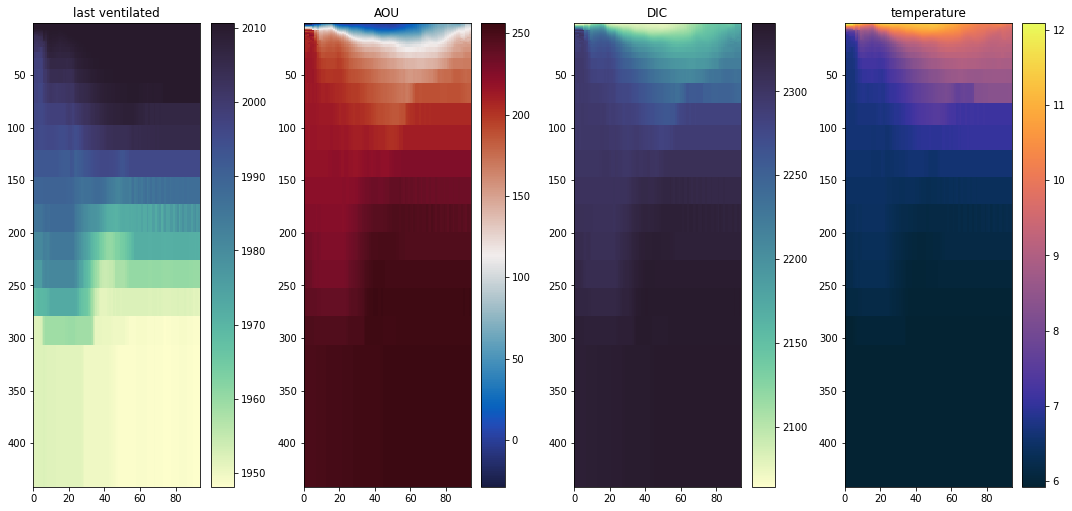

In [65]:

zlevels = (test_LO['deptht'][:])
section_slice = np.arange(0, 95)
fact = 0.6

fig, axs = plt.subplots(1,4, figsize=(25*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tplt = pycnal_last_at_surface[:,0:95]
mesh = axs[0].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.deep)
axs[0].invert_yaxis()
axs[0].set_title('last ventilated')
fig.colorbar(mesh, ax=axs[0])

tplt = AOU[:,0:95]
mesh = axs[1].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.balance)
axs[1].invert_yaxis()
axs[1].set_title('AOU')
fig.colorbar(mesh, ax=axs[1])

tplt = summer_DIC[:,0:95]
mesh = axs[2].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.deep)
axs[2].invert_yaxis()
axs[2].set_title('DIC')
fig.colorbar(mesh, ax=axs[2])

tplt = temp[:,0:95]
mesh = axs[3].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.thermal)
axs[3].invert_yaxis()
axs[3].set_title('temperature')
fig.colorbar(mesh, ax=axs[3])


plt.tight_layout()

## winter day jan 15

In [66]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2020m01d15.nc')
zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
sigma0 = gsw.sigma0(sal,temp)
winter_DIC = test_LO['DIC'][0,:,0,:]
TA = test_LO['TA'][0,:,0,:]
O2 = test_LO['OXY'][0,:,0,:]
depth_this = np.zeros_like(TA)
#depth_this - array of depths of same shape as DIC
for i in range(0,950):
    depth_this[:,i] = zlevels

#calculate pycnal's last surfacing, according to exp function
#found using cfc ages
params0 = 0.1301889490932413
params1 = 3.8509914822057825
params2 = 8.301166081413104
pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-sigma0))+params2)

#find last seen atmospheric co2
# pycnal_witnessed_atm_co2 = np.zeros_like(pycnal_last_at_surface)
# for i in range(0,40):
#     for j in range(0,950):
#         ty = pycnal_last_at_surface[i,j]
#         tco2 = co2_from_year(ty)
#         pycnal_witnessed_atm_co2[i,j] = tco2

#(1) estimate AOU on 26 (assoc with water parcel with DIC_{w,2019,26,jdf})
# = f(O2_{w,2019,26,jdf},S_{w,2019,26,jdf},T_{w,2019,26,jdf}, P_{w,2019,26,jdf})
#(P is there to determine T when last at surface - I'll call it preT next)

osol = gsw.O2sol(sal,temp,depth_this,-125,50)
AOU = osol - O2
print('max AOU: '+str(np.max(AOU)) + ', min AOU: '+ str(np.min(AOU)))
AOU_stoich = np.copy(AOU)
AOU_stoich = AOU_stoich * (117/170)

max AOU: 231.70876794348206, min AOU: 18.344105258025024


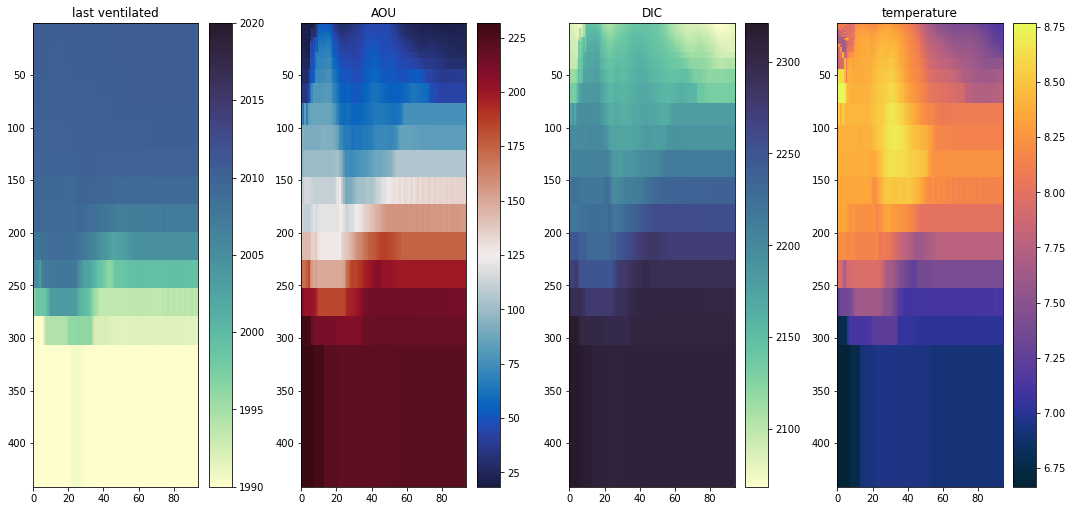

In [79]:

zlevels = (test_LO['deptht'][:])
section_slice = np.arange(0, 95)
fact = 0.6

fig, axs = plt.subplots(1,4, figsize=(25*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tplt = pycnal_last_at_surface[:,0:95]
mesh = axs[0].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.deep, vmin = 1990, vmax = 2020)
axs[0].invert_yaxis()
axs[0].set_title('last ventilated')
fig.colorbar(mesh, ax=axs[0], )

tplt = AOU[:,0:95]
mesh = axs[1].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.balance)
axs[1].invert_yaxis()
axs[1].set_title('AOU')
fig.colorbar(mesh, ax=axs[1])

tplt = winter_DIC[:,0:95]
mesh = axs[2].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.deep)
axs[2].invert_yaxis()
axs[2].set_title('DIC')
fig.colorbar(mesh, ax=axs[2])

tplt = temp[:,0:95]
mesh = axs[3].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.thermal)
axs[3].invert_yaxis()
axs[3].set_title('temperature')
fig.colorbar(mesh, ax=axs[3])


plt.tight_layout()

In [68]:
winter_pi = nc.Dataset('./PREIND_BCCOND/PREIND_BC_v201905_y2015m01d15.nc')
winter_pi_DIC = (winter_pi['DIC'][0,:,0,0:95])
summer_pi = nc.Dataset('./PREIND_BCCOND/PREIND_BC_v201905_y2015m07d15.nc')
summer_pi_DIC = (summer_pi['DIC'][0,:,0,0:95])

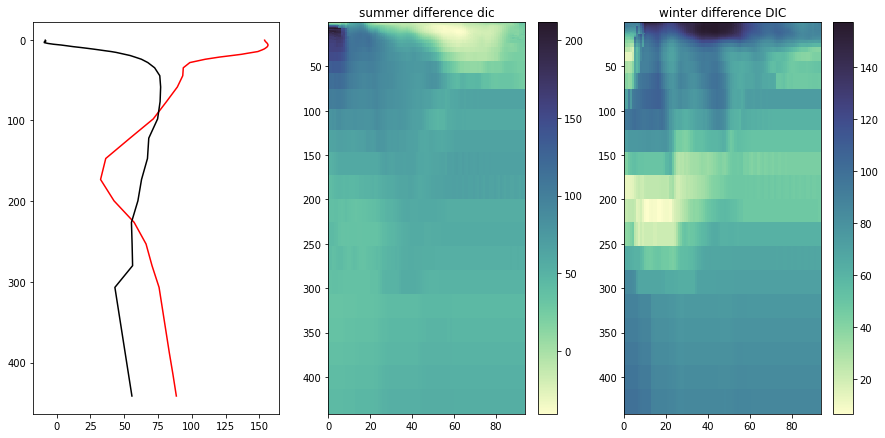

In [76]:
zlevels = (test_LO['deptht'][:])
section_slice = np.arange(0, 95)
fact = 0.6

fig, axs = plt.subplots(1,3, figsize=(25*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(winter_DIC[:,37]-winter_pi_DIC[:,37],zlevels[:],'r-')
axs[0].plot(summer_DIC[:,37]-summer_pi_DIC[:,37],zlevels[:],'k-')
axs[0].invert_yaxis()

tplt = summer_DIC[:,0:95]-summer_pi_DIC
mesh = axs[1].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.deep)
axs[1].invert_yaxis()
axs[1].set_title('summer difference dic')
fig.colorbar(mesh, ax=axs[1])

tplt = winter_DIC[:,0:95]-winter_pi_DIC
mesh = axs[2].pcolormesh(section_slice[:],zlevels[:],tplt, cmap = cm.cm.deep)
axs[2].invert_yaxis()
axs[2].set_title('winter difference DIC')
fig.colorbar(mesh, ax=axs[2])
